# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Read Data

In [ ]:
df=pd.read_csv('bank_merged.csv')

In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [ ]:
null_rat=pd.DataFrame({'null_ratio':df.isnull().sum()/df.shape[0]})
null_rat

null_ratio
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
balance           0.0
housing           0.0
loan              0.0
contact           0.0
day               0.0
month             0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
y                 0.0

In [ ]:
# see object to classify ccategory or not
obj_cols=df.select_dtypes(include='object').columns
data_dict={
    'unique_values':df[obj_cols].nunique()
}
data_frame=pd.DataFrame(data_dict).sort_values(by='unique_values')
data_frame

unique_values
default                2
housing                2
loan                   2
y                      2
marital                3
contact                3
education              4
poutcome               4
job                   12
month                 12

In [ ]:
categorical_cols=data_frame[data_frame['unique_values']<5].index
df[categorical_cols]=df[categorical_cols].astype('category')

In [ ]:
df[categorical_cols].head(15)

default housing loan   y   marital  contact  education poutcome
0       no     yes   no  no   married  unknown   tertiary  unknown
1       no     yes   no  no    single  unknown  secondary  unknown
2       no     yes  yes  no   married  unknown  secondary  unknown
3       no     yes   no  no   married  unknown    unknown  unknown
4       no      no   no  no    single  unknown    unknown  unknown
5       no     yes   no  no   married  unknown   tertiary  unknown
6       no     yes  yes  no    single  unknown   tertiary  unknown
7      yes     yes   no  no  divorced  unknown   tertiary  unknown
8       no     yes   no  no   married  unknown    primary  unknown
9       no     yes   no  no    single  unknown  secondary  unknown
10      no     yes   no  no  divorced  unknown  secondary  unknown
11      no     yes   no  no    single  unknown  secondary  unknown
12      no     yes   no  no   married  unknown  secondary  unknown
13      no     yes   no  no   married  unknown    unknown  unknown
14      no     yes   no  no   married  unknown  secondary  unknown

In [ ]:
for col in df[categorical_cols].columns:
  print(df[col].value_counts())
# one hot to [marital, contact, job]
# manual incoding to education
# drop poutcome
# label incoder [default , housing , loan , y]

default
no     48841
yes      891
Name: count, dtype: int64
housing
yes    27689
no     22043
Name: count, dtype: int64
loan
no     41797
yes     7935
Name: count, dtype: int64
y
no     43922
yes     5810
Name: count, dtype: int64
marital
married     30011
single      13986
divorced     5735
Name: count, dtype: int64
contact
cellular     32181
unknown      14344
telephone     3207
Name: count, dtype: int64
education
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: count, dtype: int64
poutcome
unknown    40664
failure     5391
other       2037
success     1640
Name: count, dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=['poutcome'],inplace=True)

# Data Visualisation

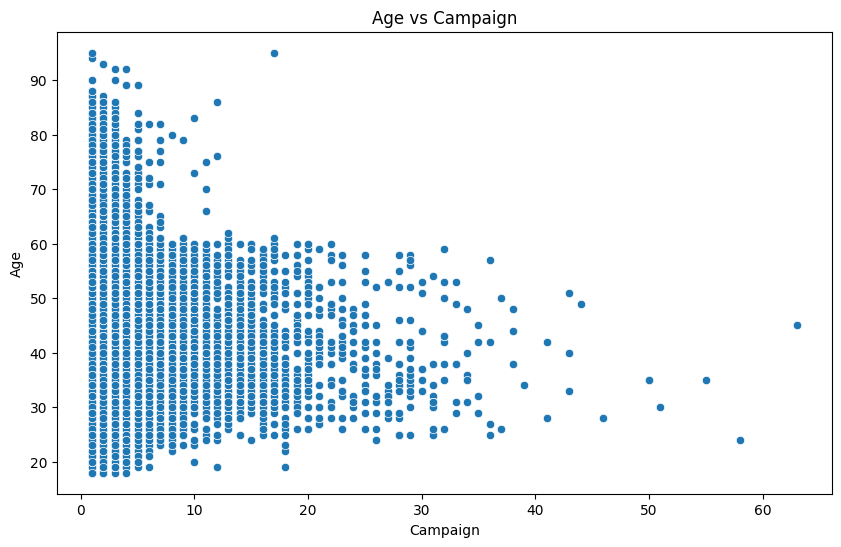

In [ ]:
# age & campaign
plt.figure(figsize=(10,6))
sns.scatterplot( x='campaign',y='age', data=df)
plt.title('Age vs Campaign')
plt.xlabel('Campaign')
plt.ylabel('Age')
plt.show()

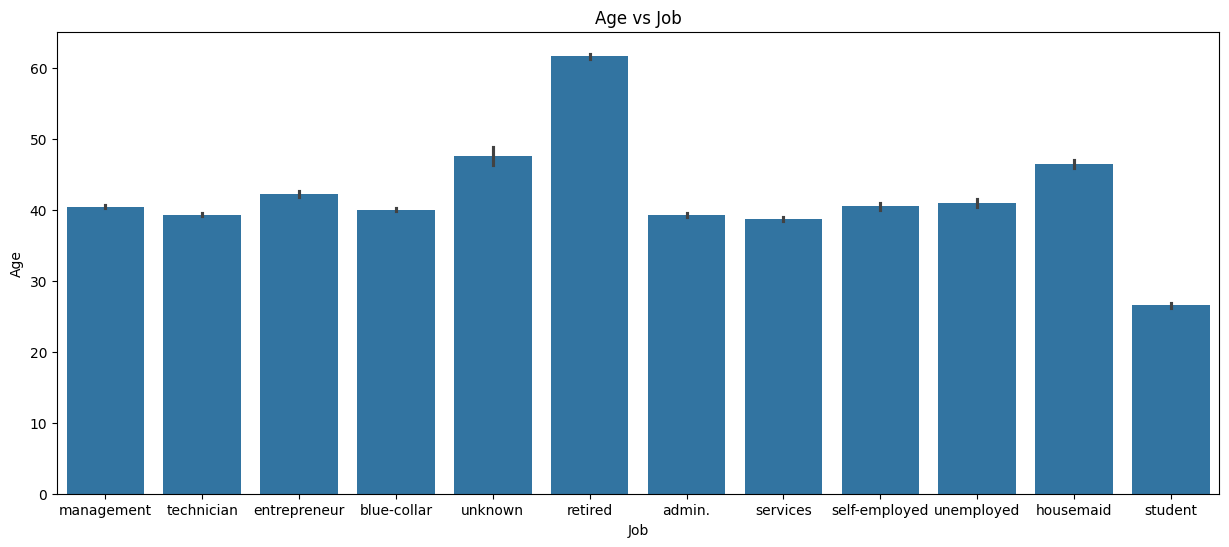

In [ ]:
# age and job
plt.figure(figsize=(15,6))
sns.barplot(x='job',y='age',data=df)
plt.title('Age vs Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Marital vs Loan & Housing')

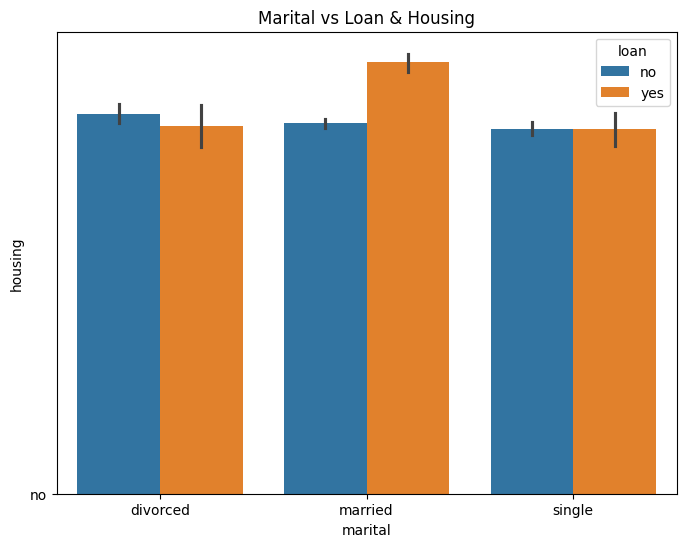

In [ ]:
# martial loan housing
plt.figure(figsize=(8,6))
sns.barplot(x='marital',y='housing',hue='loan',data=df)
plt.gca().invert_yaxis()
plt.title('Marital vs Loan & Housing')

In [ ]:
# martial and  balance have loan or no
plt.figure(figsize=(8,6))
px.violin(df,x='marital',y='balance',color='loan')

<Figure size 800x600 with 0 Axes>

In [ ]:
# age and response
px.histogram(df,x='age',color='y')

In [ ]:
# Contact Method and Response
px.histogram(df,x='contact',color='y')

In [ ]:
# age balance and response
px.scatter_3d(df,x='age',y='balance',z='y',color='marital')

In [ ]:
# day month response
px.scatter_3d(df,x='day',y='month',z='y',color='marital')

In [ ]:
px.box(df,y='balance')

In [ ]:

px.box(df,y='day')

In [ ]:
px.box(df,y='duration')

In [ ]:
px.box(df,y='campaign')

In [ ]:
px.box(df,y='pdays')

In [ ]:
px.box(df,y='previous')

# Prepare Data to Model

In [ ]:
# outliers
for col in df.select_dtypes(include='number').columns[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

<ipython-input-26-54f1d5e11d8a>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-26-54f1d5e11d8a>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

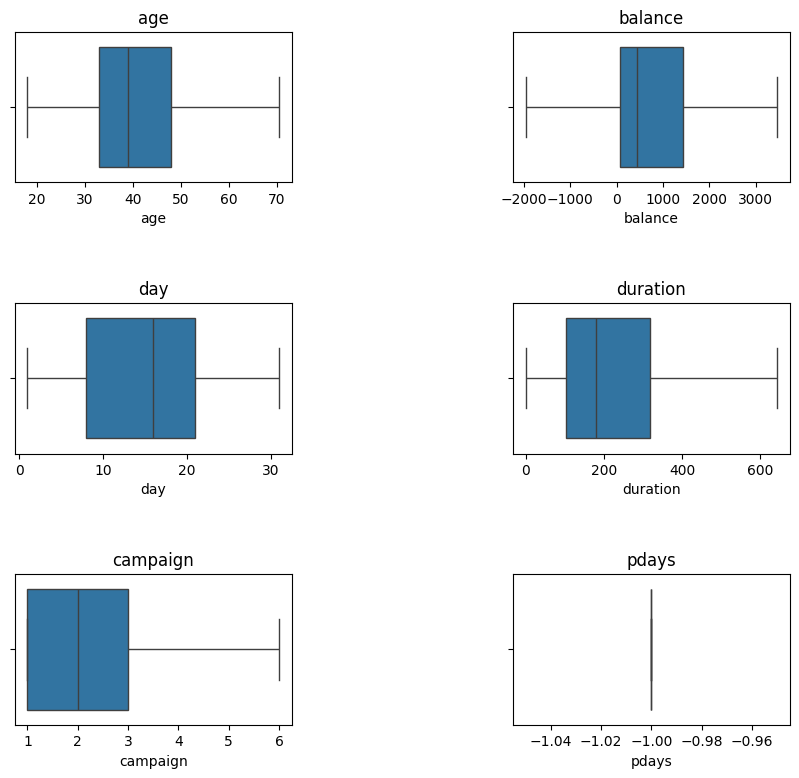

In [ ]:
# check process
plt.figure(figsize=(10, 9))
for i, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(3, 2, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [ ]:
# one hot to [marital, contact, job]
one_hot=['marital', 'contact', 'job']
df=pd.get_dummies(df,columns=one_hot,drop_first=True)

In [ ]:
# manual incoding to education
df.replace({
    "unknown": 0,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3},inplace=True)

<ipython-input-29-5e2aa040453f>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-29-5e2aa040453f>:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [ ]:
#  label incoder [default , housing , loan , y]
label__incoder = ['default' , 'housing' , 'loan' , 'y' ]
le = LabelEncoder()
for col in label__incoder:
    df[col]=le.fit_transform(df[col])

In [ ]:
df.iloc[:,13:]=df.iloc[:,13:].astype(int)

<ipython-input-31-293728639e71>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1
1        0
2        1
3        1
4        0
        ..
45206    1
45207    0
45208    1
45209    1
45210    1
Name: marital_married, Length: 45211, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

<ipython-input-31-293728639e71>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1        1
2        0
3        0
4        1
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: marital_single, Length: 45211, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

<ipython-input-31-293728639e71>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0
1       

In [ ]:
months_rank={'jan': 1,'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7,'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12}
df['month'].replace(months_rank,inplace=True)

<ipython-input-32-f29c84fed988>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-32-f29c84fed988>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df.head()

age education  default  balance  housing  loan  day  month  duration  \
0  58.0         3        0     2143        1     0    5      5       261   
1  44.0         2        0       29        1     0    5      5       151   
2  33.0         2        0        2        1     1    5      5        76   
3  47.0         0        0     1506        1     0    5      5        92   
4  33.0         0        0        1        0     0    5      5       198   

   campaign  ...  job_entrepreneur  job_housemaid  job_management  \
0         1  ...                 0              0               1   
1         1  ...                 0              0               0   
2         1  ...                 1              0               0   
3         1  ...                 0              0               0   
4         1  ...                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   job_unemployed  job_unknown  
0               0            0  
1               0            0  
2               0            0  
3               0            0  
4               0            1  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45211 non-null  float64 
 1   education          45211 non-null  category
 2   default            45211 non-null  int64   
 3   balance            45211 non-null  int64   
 4   housing            45211 non-null  int64   
 5   loan               45211 non-null  int64   
 6   day                45211 non-null  int64   
 7   month              45211 non-null  int64   
 8   duration           45211 non-null  int64   
 9   campaign           45211 non-null  int64   
 10  pdays              45211 non-null  int64   
 11  previous           45211 non-null  int64   
 12  y                  45211 non-null  int64   
 13  marital_married    45211 non-null  int64   
 14  marital_single     45211 non-null  int64   
 15  contact_telephone  45211 non-null  int64   
 16  contact_u

# Data Split

<Axes: >

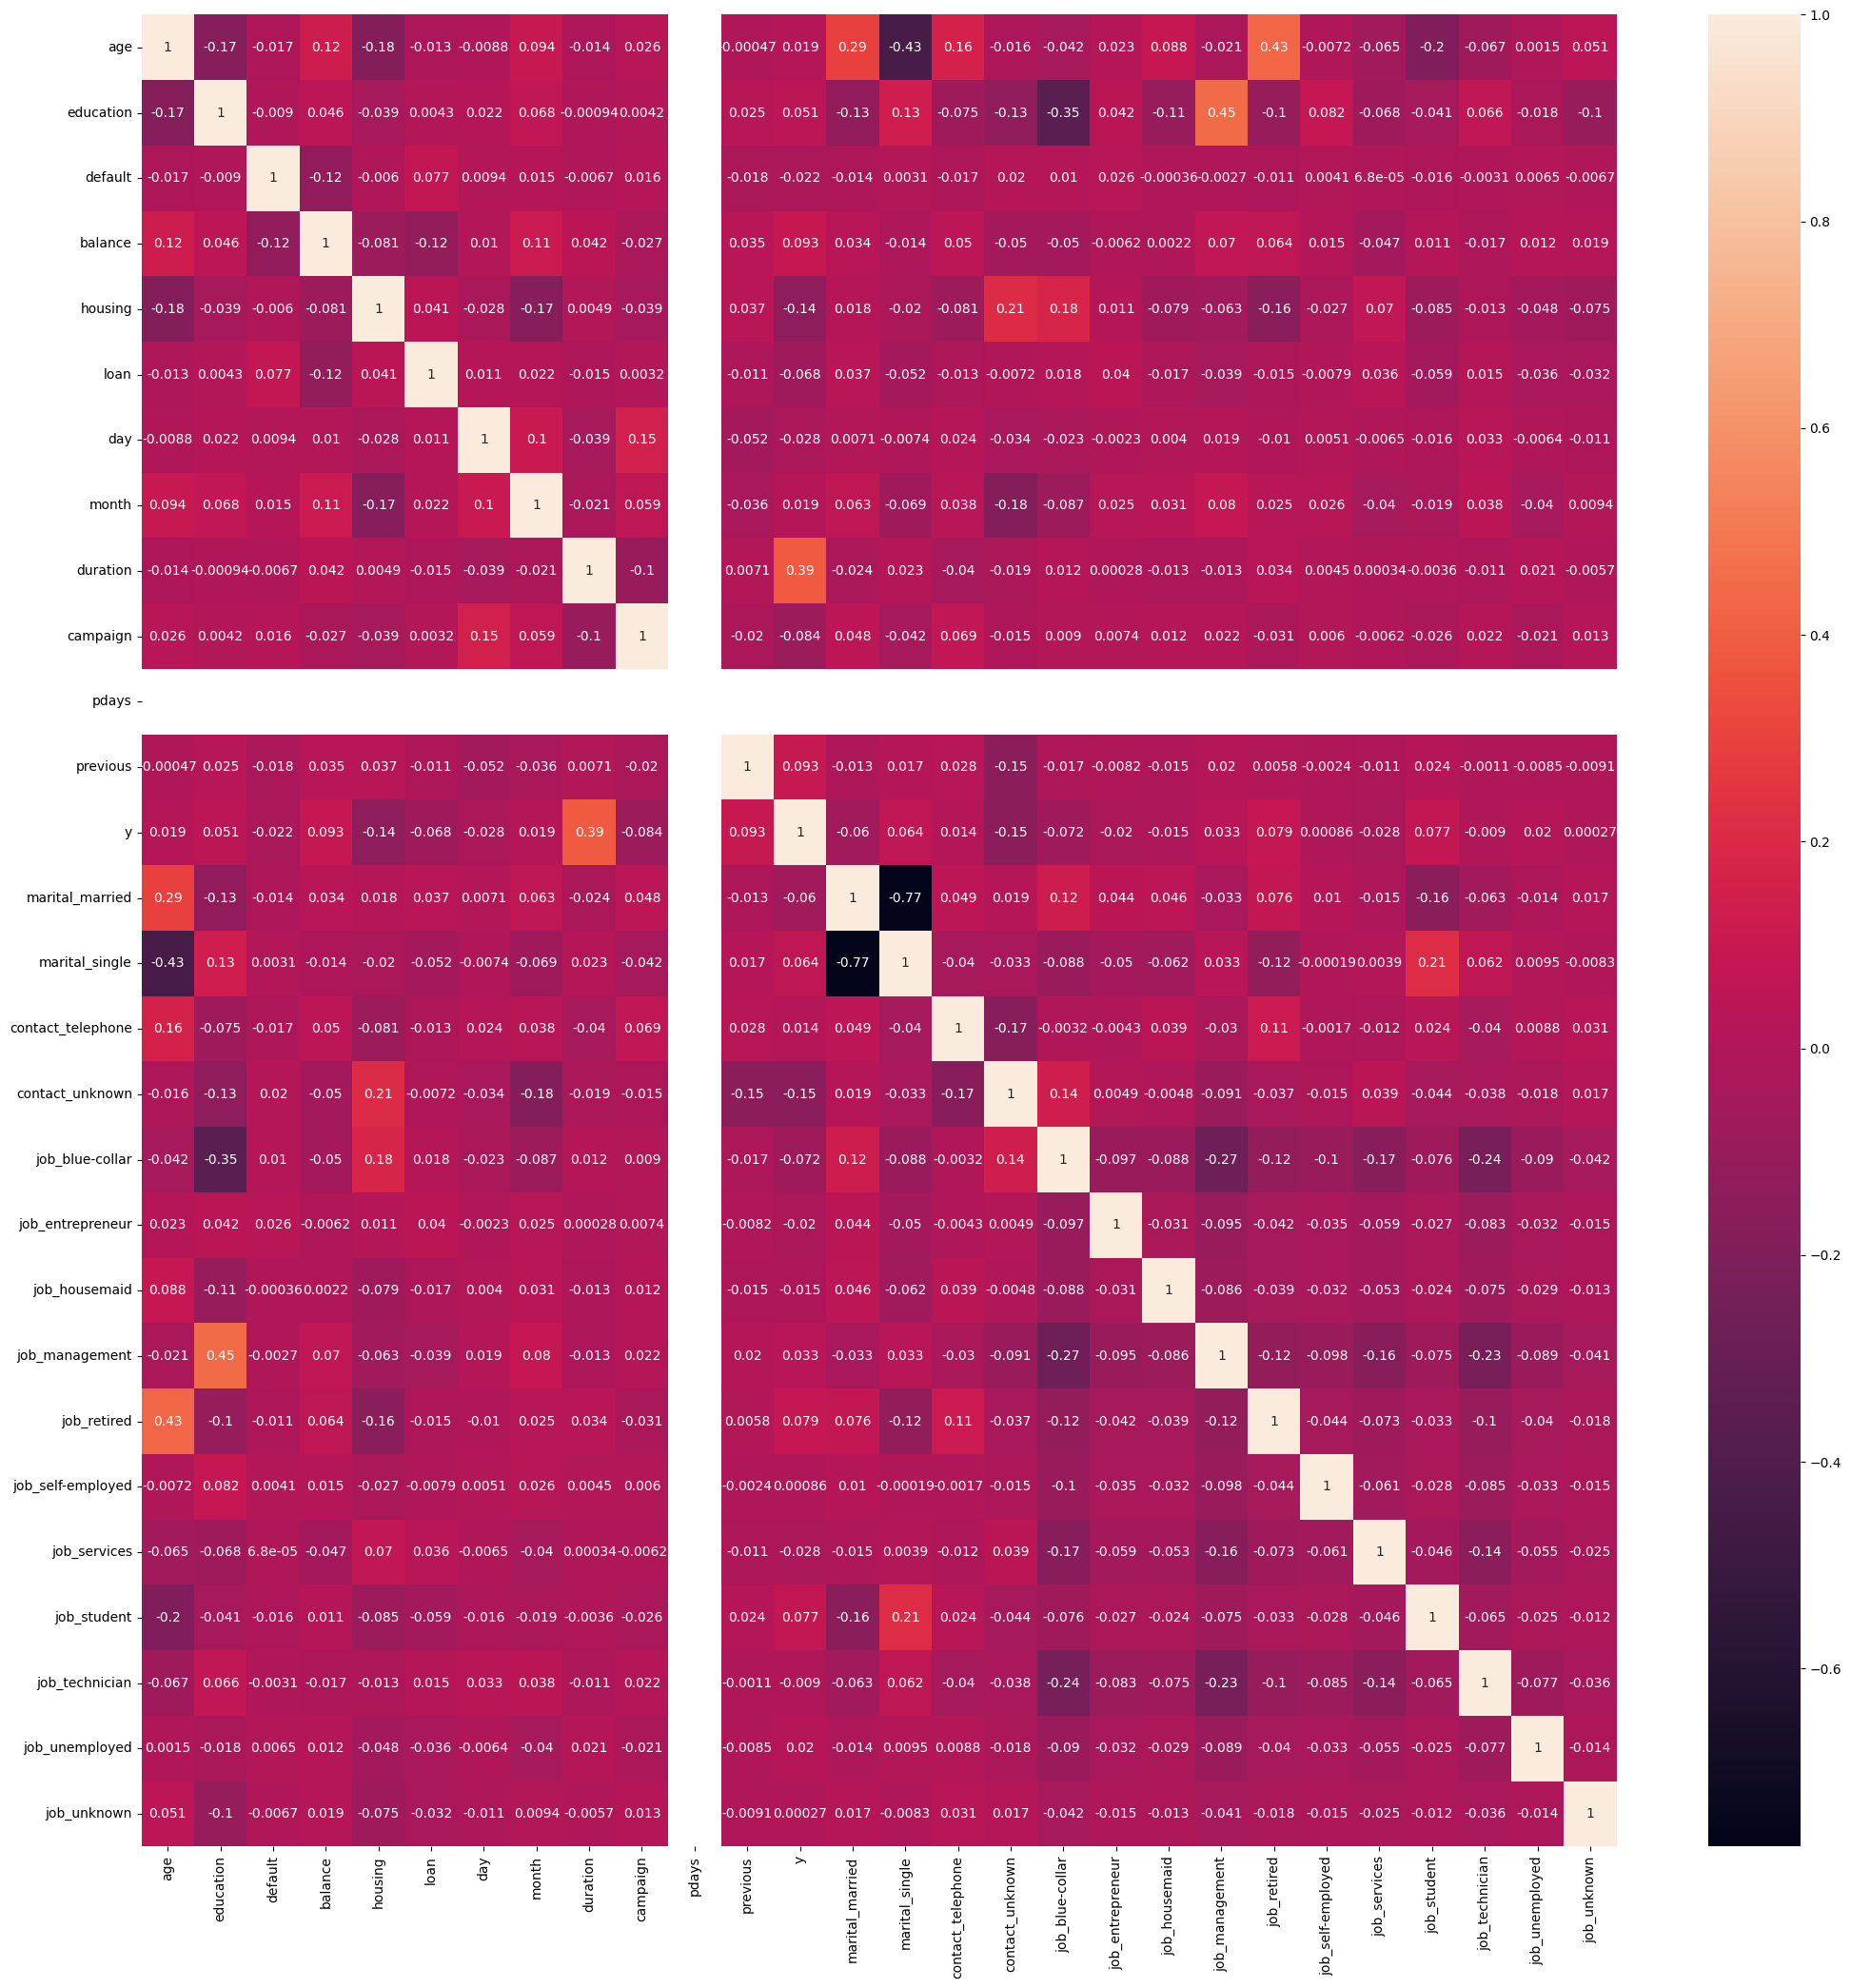

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# split data
x = df.drop('y', axis=1)
y = df['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# **Machine**

In [ ]:
# logistic regression model
logis_r=LogisticRegression(max_iter=10000)
logis_r.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Gross validation
k_folds = KFold(n_splits = 5)
scores = cross_val_score(logis_r, x, y, cv = k_folds)
y_pred=logis_r.predict(x_test)
print(f"Cross Validation Scores:  {scores}\nAverage CV Score:  {scores.mean()} \nNumber of CV Scores used in Average:  {len(scores)} \n{accuracy_score(y_test,y_pred)} \n{confusion_matrix(y_test,y_pred)} \n{classification_report(y_test,y_pred)}")

Cross Validation Scores:  [0.96605109 0.94005751 0.91439947 0.85080734 0.70482194]
Average CV Score:  0.8752274706682318 
Number of CV Scores used in Average:  5 
0.8847727524051753 
[[7740  240]
 [ 802  261]] 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7980
           1       0.52      0.25      0.33      1063

    accuracy                           0.88      9043
   macro avg       0.71      0.61      0.64      9043
weighted avg       0.86      0.88      0.87      9043



In [ ]:
dec_t=DecisionTreeClassifier()
dec_t.fit(x_train,y_train)
grd_param={
    'max_depth':[3,5,10,20],
    'min_samples_split':[2,5,10,15,100],
    'min_samples_leaf':[1,2,5,10],
    'criterion':['gini','entropy']
}
grd_sr=GridSearchCV(estimator=dec_t,param_grid=grd_param,cv=5,n_jobs=-1,scoring='accuracy',verbose=2)
grd_sr.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
dec_t = grd_sr.best_estimator_
best_parameters = grd_sr.best_params_
best_score = grd_sr.best_score_
print(f"Optimal model: \n{dec_t}")
print("-"*100)
print(f"Best parameters: {best_parameters}")
print("-"*100)
print(f"Best score from GridSearchCV: {best_score}")
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dec_t, x, y, cv=k_folds)
dec_t.fit(x, y)
y_pred = dec_t.predict(x_test)
print(f"Cross Validation Scores: {scores}")
print("-"*100)
print(f"Average CV Score: {scores.mean()}")
print("-"*100)
print(f"Number of CV Scores used in Average: {len(scores)}")
print("-"*100)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("-"*100)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("-"*100)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Optimal model: 
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=100)
----------------------------------------------------------------------------------------------------
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 100}
----------------------------------------------------------------------------------------------------
Best score from GridSearchCV: 0.8945476797223245
Cross Validation Scores: [0.89063364 0.89216987 0.889405   0.90079628 0.89957974]
----------------------------------------------------------------------------------------------------
Average CV Score: 0.8945169070197018
----------------------------------------------------------------------------------------------------
Number of CV Scores used in Average: 5
----------------------------------------------------------------------------------------------------
Accuracy Score: 0.9014707508570164
---

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
random_f=RandomForestClassifier()
random_f.fit(x_train,y_train)
grd_param={
    'n_estimators':[10,50,100],
    'max_depth':[3,5,10,20],
    'min_samples_leaf':[1,2,5,10]}
grd_sr=GridSearchCV(estimator=random_f,param_grid=grd_param,cv=5,n_jobs=-1,scoring='accuracy',verbose=1)
grd_sr.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
dec_t = grd_sr.best_estimator_
best_parameters = grd_sr.best_params_
best_score = grd_sr.best_score_
print(f"Optimal model: \n{dec_t}")
print("-"*100)
print(f"Best parameters: {best_parameters}")
print("-"*100)
print(f"Best score from GridSearchCV: {best_score}")
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dec_t, x, y, cv=k_folds)
dec_t.fit(x, y)
y_pred = dec_t.predict(x_test)
print(f"Cross Validation Scores: {scores}")
print("-"*100)
print(f"Average CV Score: {scores.mean()}")
print("-"*100)
print(f"Number of CV Scores used in Average: {len(scores)}")
print("-"*100)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("-"*100)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print("-"*100)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Optimal model: 
RandomForestClassifier(max_depth=20, min_samples_leaf=2)
----------------------------------------------------------------------------------------------------
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}
----------------------------------------------------------------------------------------------------
Best score from GridSearchCV: 0.8983080420312686
Cross Validation Scores: [0.89771094 0.89913736 0.89272285 0.90212342 0.9003539 ]
----------------------------------------------------------------------------------------------------
Average CV Score: 0.8984096945158895
----------------------------------------------------------------------------------------------------
Number of CV Scores used in Average: 5
----------------------------------------------------------------------------------------------------
Accuracy Score: 0.9701426517748535
----------------------------------------------------------------------------------------------------


# Deep Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 128)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,937 (54.44 KB)

 Trainable params: 13,497 (52.72 KB)

 Non-trainable params: 440 (1.72 KB)

In [ ]:

# Define the callback
checkpoint = ModelCheckpoint(
    filepath="best_model.keras",  # Path to save the model weights
    monitor="val_loss",       # Metric to monitor (e.g., "val_loss" or "val_accuracy")
    save_best_only=True,      # Save only the best weights
    mode="min",               # "min" for loss, "max" for accuracy
    verbose=1                 # Print updates during training
)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.20,callbacks=checkpoint)

Epoch 1/50
903/905 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8884 - loss: 0.2576
Epoch 1: val_loss improved from 0.23774 to 0.23687, saving model to best_model.keras
905/905 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8884 - loss: 0.2576 - val_accuracy: 0.8907 - val_loss: 0.2369
Epoch 2/50
901/905 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8815 - loss: 0.2624
Epoch 2: val_loss did not improve from 0.23687
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8815 - loss: 0.2623 - val_accuracy: 0.8894 - val_loss: 0.2876
Epoch 3/50
901/905 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - loss: 0.2586
Epoch 3: val_loss did not improve from 0.23687
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8828 - loss: 0.2586 - val_accuracy: 0.8890 - val_loss: 0.2489
Epoch 4/50
894/905 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8875 - loss: 0.2499
Epoch 4: val_loss did not improve from 0.23687
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8875 - loss: 0.2499 -

In [ ]:
model.evaluate(x_test,y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846 - loss: 0.2701


[0.2735758423805237, 0.8846621513366699]

In [ ]:
model.evaluate(x_train,y_train)

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8876 - loss: 0.2620


[0.260944664478302, 0.8876354694366455]

In [ ]:
model.evaluate(x_train,y_train)

1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8845 - loss: 0.2653


[0.2628331482410431, 0.8855894804000854]

#Model Performance Comparison

In [23]:
models = ["Logistic Regression", "Decision Trees", "Random Forests", "Neural Network"]
accuracies = [88, 90, 97, 89]
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']
fig = go.Figure(data=[go.Bar(
    x=models,
    y=accuracies,
    text=accuracies,
    textposition='auto',
    marker_color=colors
)])

fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Machine Learning Models",
    yaxis_title="Accuracy (%)",
    yaxis=dict(range=[80, 100]),
    template="plotly_dark",
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()